In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
data=pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,36,103,85
1,2,Female,34,103,23
2,3,Female,32,103,69
3,4,Male,33,113,8
4,5,Female,38,113,91


In [4]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.039087,0.381820,0.016560
Age,-0.039087,1.000000,-0.020551,-0.284538
Annual Income (k$),0.381820,-0.020551,1.000000,0.005362
Spending Score (1-100),0.016560,-0.284538,0.005362,1.000000


C:\Users\Galika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

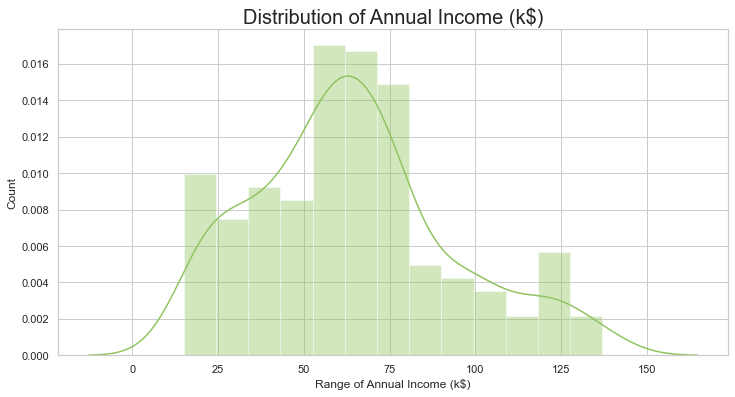

In [5]:
#Distribution of Annnual Income
plt.figure(figsize=(12, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'], color="#91C460")
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

C:\Users\Galika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

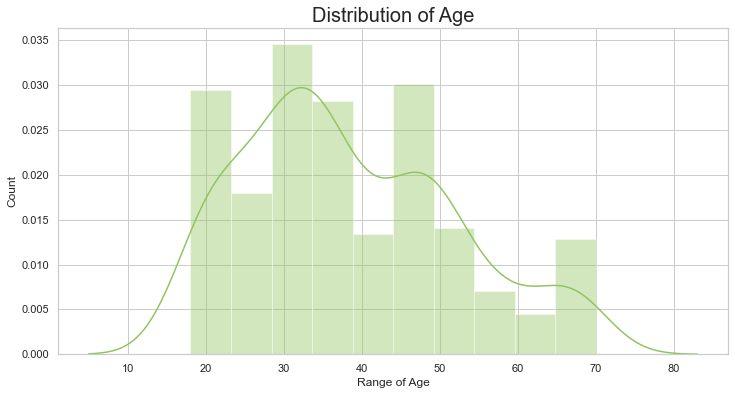

In [6]:
#Distribution of age
plt.figure(figsize=(12, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color="#91C460")
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

C:\Users\Galika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

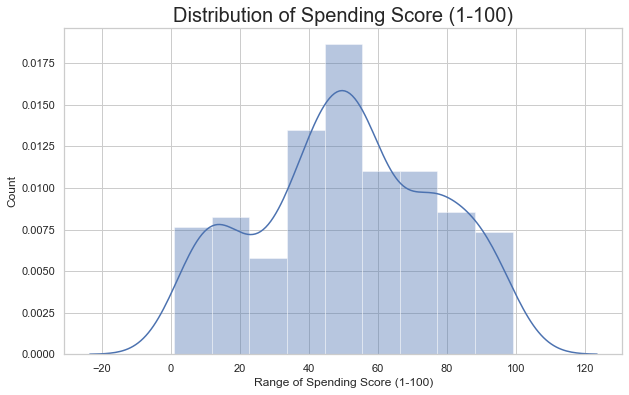

In [7]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

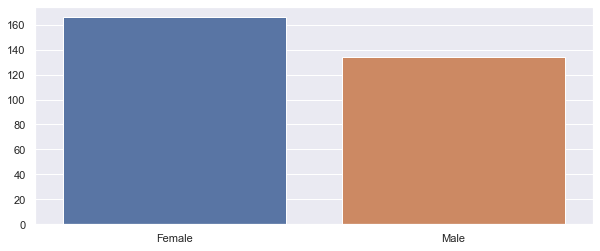

In [8]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [9]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [10]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,103,85
1,103,23
2,103,69
3,113,8
4,113,91


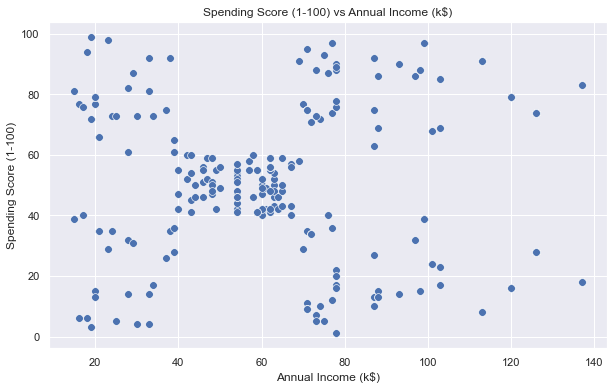

In [11]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [12]:
#Import k-means from sklearn
from sklearn.cluster import KMeans

In [13]:
#Within Clusters Sum Of Squares - define the sum of squared distance between each member of cluster and its centroid
WCSS = []

for i in range(1,11):
    k = KMeans(n_clusters = i,init ='k-means++',random_state = 42)
    #compute k-means clustering
    k.fit(X)
    #sum of squared distance of samples to their closest cluster center,weighted by the sample weights provided
    WCSS.append(k.inertia_)


C:\Users\Galika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


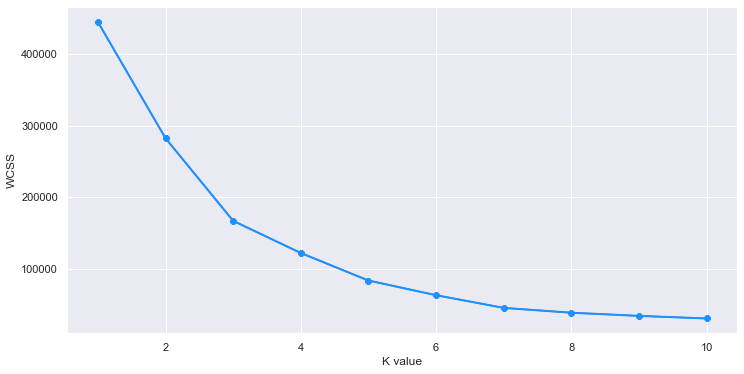

In [14]:
#elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),WCSS)
plt.plot(range(1,11),WCSS, linewidth = 2,color="dodgerblue",marker="8")
plt.xlabel("K value")
#plt.xticks(np.arrange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [15]:
#use no of 5 clusters 
km = KMeans(n_clusters = 5)
#input data fitting
km.fit(X)
#compute cluster centers and predict cluster index for each input data
y = km.predict(X)
#adding labels to a column label
df1["label"] = y
#new dataframe with clustering
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Female,36,103,85,0
1,2,Female,34,103,23,1
2,3,Female,32,103,69,0
3,4,Male,33,113,8,1
4,5,Female,38,113,91,0


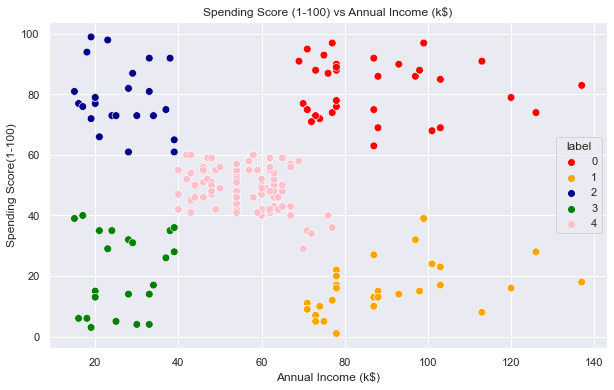

In [16]:
#scatterplot of clusters
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue = 'label',
               palette = ['red','orange','darkblue','green','pink'],legend = 'full',data = df1,s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()